In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline  
data=pd.read_csv("dataset/up_data.csv")
data.shape

(65, 3)

In [2]:
y=data['2'] # length
x=data["3"] # Resistance
x1=[]
y1=[]
x2=[]
x3=[]
for i in range(64):
    x1.append(x[i])
    y1.append(y[i])
    x2.append((x[i]**2)*0.0001) # 2차 함수 : 0.0001
    x3.append((x[i]**3)*0.00000001)
W1=tf.Variable(tf.random_normal([1]),name='weight1')
W2=tf.Variable(tf.random_normal([1]),name='weight2')
W3=tf.Variable(tf.random_normal([1]),name='weight3')
B=tf.Variable(tf.random_normal([1]),name='bias')
X1=tf.placeholder(tf.float32)
X2=tf.placeholder(tf.float32)
X3=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

In [3]:
hypothesis=B+X1*W1
cost=tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000000001) # 2차 함수 : 0.000000001
train=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [4]:
for step in range(10000):
    cost_val, hy_val, _,w1,b = sess.run([cost, hypothesis, train,W1,B],
                                   feed_dict={X1:x1, Y:y1})
    if step % 500 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val,"\nW1:{},B:{}".format(w1,b))

0 Cost:  16907728.0 
Prediction:
 [ -537.6554   -541.7915   -541.7915   -541.7915   -537.6554   -541.7915
  -545.9398   -541.7915   -674.9358   -891.68335 -1118.338   -1366.3035
 -1548.6277  -1754.0018  -1922.433   -2103.0732  -2269.9612  -2399.9983
 -2556.6025  -2701.191   -2831.1787  -2967.167   -3109.5789  -3258.8816
 -3375.6868  -3469.5642  -3608.5256  -3709.371   -3828.4233  -3936.0774
 -4031.0696  -4128.6763  -4195.2515  -4245.9985  -4420.406   -4492.5225
 -4529.104   -4659.9766  -4622.1274  -4795.445   -4895.1543  -4956.2036
 -5018.196   -4835.027   -5123.6763  -5188.2983  -5231.949   -5320.65
 -5550.932   -5457.318   -5457.318   -5503.868   -5550.932   -5574.6587
 -5622.504   -5695.2754  -5719.8076  -5719.8076  -5794.226   -5794.226
 -5819.312   -5844.542   -5869.915   -5895.433  ] 
W1:[-0.30614927],B:[0.12639283]
500 Cost:  0.6609466 
Prediction:
 [0.60279197 0.6064558  0.6064558  0.6064558  0.60279197 0.6064558
 0.6101305  0.6064558  0.7243979  0.9163976  1.1171731  1.3368262

5500 Cost:  0.6609466 
Prediction:
 [0.60279197 0.6064558  0.6064558  0.6064558  0.60279197 0.6064558
 0.6101305  0.6064558  0.7243979  0.9163976  1.1171731  1.3368262
 1.4983329  1.6802578  1.8294576  1.9894727  2.137306   2.2524955
 2.3912191  2.5192986  2.6344445  2.754906   2.8810573  3.0133128
 3.1167815  3.1999402  3.323035   3.4123662  3.5178251  3.6131876
 3.6973336  3.7837958  3.8427694  3.8877225  4.042216   4.106098
 4.1385036  4.254433   4.220906   4.3744335  4.4627585  4.5168376
 4.5717516  4.4094963  4.6651883  4.7224317  4.761099   4.8396716
 5.0436606  4.9607353  4.9607353  5.0019703  5.0436606  5.064678
 5.1070604  5.171523   5.193254   5.193254   5.259176   5.259176
 5.2813973  5.3037467  5.326223   5.348827  ] 
W1:[0.00027119],B:[0.12641326]
6000 Cost:  0.6609466 
Prediction:
 [0.60279197 0.6064558  0.6064558  0.6064558  0.60279197 0.6064558
 0.6101305  0.6064558  0.7243979  0.9163976  1.1171731  1.3368262
 1.4983329  1.6802578  1.8294576  1.9894727  2.137306   2.252

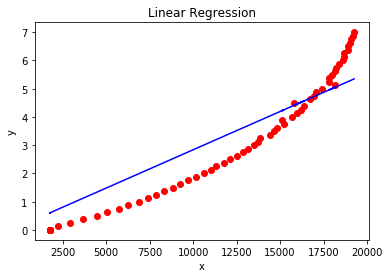

In [6]:
# W1:[0.00016793],B:[-0.88223064]

plt.figure(1)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
# 주어진 데이터들을 점으로 표시
plt.plot(x1,y1, 'ro')
# 예측한 일차함수를 직선으로 표시
plt.plot(x1,sess.run(B)+x1*sess.run(W1), 'b')
# X=5 일때의 계산 값
plt.show()